### IDs:
Insert yours IDs to the cell below

ID #1:

ID #2:


## Read the following instructions carefully:

1. This jupyter notebook contains all the step by step instructions needed for this exercise.
1. You are free to add cells.
1. Write your functions and your answers in this jupyter notebook only.
1. Answers to theoretical questions should be written in **markdown cells (with $\LaTeX$ support)**.
1. Submit this jupyter notebook only using your ID as a filename. Not to use ZIP or RAR. For example, your Moodle submission file name should look like this (two id numbers): `123456789_987654321.ipynb`.

In [16]:
import pandas as pd
import numpy as np
from numpy.linalg import matrix_power
from scipy import stats
from scipy.stats import norm
import seaborn as sns
import matplotlib.pyplot as plt
import math 
%matplotlib inline

### Question 1 - Correlations (15 points)

Provide example datapoints matching the following descriptions. Each example should be constructed over n=50 datapoints. Provide a table description of the example data as well as a jointplot (see example below). 
If you think that the situation described is impossible then clearly explain why (you don’t need to give a rigorous proof).<br>
Pearson(x,y) = Pearson correlation<br>
τ(x,y) = Kendall rank correlation<br>
ρ(x,y) = Spearman rank correlation <br>
<img src="jointplot.png">

#### 1.A
Data in which  $Pearson(x,y) < -0.9$ but where $n-1$ points can be selected so that for the vectors restricted to those we have $Pearson(x_{n-1},y_{n-1}) > -0.2$

#### 1.B
Data with τ(x,y) > ρ(x,y) + 0.45

In [4]:
# n = 50 
# X = np.arange(1,n+1)
# Y = np.arange(1,n+1) 

# for i in range(15):
#     t = Y[i]
#     Y[i] = Y[n-(i+1)]
#     Y[n-(i+1)] = t

# print(X)
# print(Y)

# df = pd.DataFrame({'x':X, 'y':Y})
# sns.jointplot(data=df, x="x", y="y")


# kendall_tau, kendall_p_value = stats.kendalltau(X, Y)
# print(kendall_tau)
# spearmanr_rho, spearmanr_p_value = stats.spearmanr(X, Y)
# print(spearmanr_rho)

# print(kendall_tau > (spearmanr_rho + 0.45))
# print(kendall_tau - spearmanr_rho)

#### 1.C
Data with τ(x,y) < ρ(x,y) – 0.45

In [5]:
# n = 50
# X = np.arange(1,n+1)
# Y = np.arange(1,n+1)

# for i in range(0,n):
#     #t = Y[i+1]
#     if i % 2 == 0:
#         Y[i] = X[i+1]
#     else:
#         Y[i] = X[i-1]
        
# print(X)
# print(Y)

# df = pd.DataFrame({'x':X, 'y':Y})
# sns.jointplot(data=df, x="x", y="y")

# kendall_tau, kendall_p_value = stats.kendalltau(X, Y)
# print(kendall_tau)
# spearmanr_rho, spearmanr_p_value = stats.spearmanr(X, Y)
# print(spearmanr_rho)

# print(kendall_tau < (spearmanr_rho - 0.45))
# print(kendall_tau - spearmanr_rho)

#### 1.D
Data with Pearson(x,y) < ρ(x,y) – 0.6

#### 1.E
Data with Pearson(x,y) > ρ(x,y) + 1.2

#### 1.F
Data with τ(x,y) < ρ(x,y) – 1.2 

### Question 2 - Analysis of the UCI Heart Disease dataset  (40 points)

Perform data analysis on the UCI Heart Disease Dataset
References:
1. Detrano, R., Janosi, A., Steinbrunn, W., Pfisterer, M., Schmid, J., Sandhu, S., Guppy, K., Lee, S., & Froelicher, V. (1989). International application of a new probability algorithm for the diagnosis of coronary artery disease. American Journal of Cardiology, 64,304--310.
2. David W. Aha & Dennis Kibler. "Instance-based prediction of heart-disease presence with the Cleveland database."
3. Gennari, J.H., Langley, P, & Fisher, D. (1989). Models of incremental concept formation. Artificial Intelligence, 40, 11--61.

Use the following links to find the details of the data: 
1. https://archive.ics.uci.edu/ml/datasets/heart+disease
2. https://www.kaggle.com/ronitf/heart-disease-uci

In the follwong cells write a report for your analysis. In your report provide a clear description of the analysis methods and of the results. This should include a graphical representation of the results and the conclusions. Provide p-values or other indicators of the statistical significance where appropriate. <br>
Design your report to be concise but still cover interesting findings.

There are missing values in the data. Find them and impute them by using the median (for numerical features) or the mode (for categorical features) value of the relevant feature (column).
Address the following questions:
* Using confidence intervals determine for which numerical features you can state with confidence of 95% that the healthy population (target = 0) mean is larger/smaller than the disease population (target = 1) mean. 
* Draw histograms for each numerical feature. Inspect the observed distributions and then use MLE to plot, on the same figures, fits of the distributions.
* For each pair of numerical feature, calculate correlations and indicate whether you find them significant. For select pairs, with significant correlations, draw joint plot with marginal histograms (see Seaborn joint plot) and find bivariate normal fits. Then use the example code below to draw plots of the bivariate pdfs (you may edit the code as you see fit).
* Are there pairs that are significantly correlated in males but not in females? The opposite? How about healthy vs disease? Can you graphically represent this?
* For each numerical feature, except age, plot the distribution for this feature against bins of age. In each bin provide a split violin plot, with different colors for healthy and disease.

Suggest, state and address at least one original question.


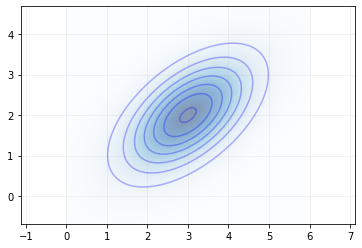

In [6]:
# Example code for bivariate pdfs
from scipy.stats import multivariate_normal as mn
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def plot_2d_Gaussian_pdf(means, cov):
    n = 100
    x1 = np.linspace(means[0] - 3 * np.sqrt(cov[0][0]), means[0] + 3 * np.sqrt(cov[0][0]), n)
    x2 = np.linspace(means[1] - 3 * np.sqrt(cov[1][1]), means[1] + 3 * np.sqrt(cov[1][1]), n)
    x1_v, x2_v = np.meshgrid(x1, x2)
    Xgrid = np.vstack([x1_v.ravel(), x2_v.ravel()]).T
    Y = mn.pdf(Xgrid, means, cov)
    fig, ax = plt.subplots()
    ax.pcolorfast(x1, x2, Y.reshape(x1_v.shape), alpha=0.5, cmap='Blues')
    ax.contour(x1_v, x2_v, Y.reshape(x1_v.shape),
               alpha=0.3, colors='b') #levels=[0.05, 0.1, 0.15, 0.2], 
    ax.axis('equal')
    ax.grid(alpha=0.2)
    plt.show()
    
means = [3, 2]
cov = [[1, 0.5], [0.5, 0.8]]
plot_2d_Gaussian_pdf(means, cov)

In [7]:
df = pd.read_csv('heart.csv', index_col=False, sep='\t')

### Understend The Data

#### Feature Description

age: age in years

sex: sex (1 = male; 0 = female)

cp: chest pain type
    -- Value 1: typical angina
    -- Value 2: atypical angina
    -- Value 3: non-anginal pain
    -- Value 4: asymptomatic
    * Angina is chest pain or discomfort caused when your heart muscle doesn't get enough oxygen-rich blood.
    
trestbps: resting blood pressure (in mm Hg on admission to the hospital)

chol: serum cholestoral in mg/dl

fbs: (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)

restecg: resting electrocardiographic results
    -- Value 0: normal
    -- Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
    -- Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
    
thalach: maximum heart rate achieved

exang: exercise induced angina (1 = yes; 0 = no)

oldpeak = ST depression induced by exercise relative to rest

slope: the slope of the peak exercise ST segment
    -- Value 1: upsloping
    -- Value 2: flat
    -- Value 3: downsloping
    
ca: number of major vessels (0-3) colored by flourosopy

thal: Thalassemia (inherited blood disorder) 1 = normal; 2 = fixed defect; 3 = reversable defect

target: diagnosis of heart disease (angiographic disease status)
    -- Value 0: < 50% diameter narrowing - Healthy
    -- Value 1: > 50% diameter narrowing - Disease

##### About the data

In [9]:
print("The amount of data -{}".format(df.shape[0]))
print("Age range {}-{}".format(df["age"].min(),df["age"].max()))
print("Number of women -{}".format(df[df["sex"] == 0].shape[0]))
print("Amount of men -{}".format(df[df["sex"] == 1].shape[0]))
print("Number of Disease {}".format(df[df["target"] == 1].shape[0]))
print("Number of Healthy \n{}".format(df[df["target"] == 0].shape[0]))
print("Chest pain amount \n{}".format( df["cp"].value_counts() ))
print("Resting blood pressure range {}-{}".format( df["trestbps"].min(),df["trestbps"].max()))
print("Cholestoral serum range {}-{}".format( df["chol"].min(),df["chol"].max()))
print("Fasting blood sugar amount \n{}".format( df["fbs"].value_counts() ))
print("Resting electrocardiographic results amount \n{}".format(df["restecg"].value_counts()  ))
print("Heart rate achieved range {}-{}".format(df["thalach"].min(),df["thalach"].max()))
print("Exercise induced angina amount \n{}".format(df["exang"].value_counts()))
print("ST depression induced by exercise relative to rest range {}-{}".format( df["oldpeak"].min(),df["chol"].max()))
print("The slope of the peak exercise ST segment amount \n{}".format(df["slope"].value_counts()))
print("Colored by flourosopy amount \n{}".format(df["ca"].value_counts()))
print("Thalassemia amount \n{}".format(df["thal"].value_counts()))

The amount of data -303
Age range 29.0-77.0
Number of women -95
Amount of men -204
Number of Disease 165
Number of Healthy 
138
Chest pain amount 
0.0    140
2.0     85
1.0     50
3.0     23
Name: cp, dtype: int64
Resting blood pressure range 94.0-200.0
Cholestoral serum range 126.0-564.0
Fasting blood sugar amount 
0.0    255
1.0     45
Name: fbs, dtype: int64
Resting electrocardiographic results amount 
1.0    151
0.0    147
2.0      3
Name: restecg, dtype: int64
Heart rate achieved range 71.0-202.0
Exercise induced angina amount 
0    204
1     99
Name: exang, dtype: int64
ST depression induced by exercise relative to rest range 0.0-564.0
The slope of the peak exercise ST segment amount 
2    142
1    140
0     21
Name: slope, dtype: int64
Colored by flourosopy amount 
0    175
1     65
2     38
3     20
4      5
Name: ca, dtype: int64
Thalassemia amount 
2    166
3    117
1     18
0      2
Name: thal, dtype: int64


* Our dataset is very small (303 observations) so apparently the conclusions from it do not represent real conclusions
* we have no information on how the patients were selected
* We can see that we have 2 times more men than women
* The same number of sick and healthy

Normal Range

* A normal blood pressure level is less than 120/80 mmHg
* Cholesterol level is lower than 200 mg/dL. 
  Anything between 200 and 239 mg/dL is borderline, and anything above 240 mg/dL is high. 
* Normal resting heart rates range from 60 to 100 bpm.
* A fasting blood sugar level less than 100 mg/dL is normal.
  A fasting blood sugar level from 100 to 125 mg/dL is considered prediabetes.

Hypotheses (We are not doctors, general assumptions):
* Man more disease than women.   
* Thalassemia patients will be more likely to have heart disease.
* Older people will be more likely to have heart disease.
* People with High-cholesterol  will be more likely to have heart disease.
* Patients with ST depression induced by exercise relative to rest will be more patients with heart disease.

In [10]:
# 5 first row of the data
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1.0,3.0,145.0,233.0,1.0,0.0,150.0,0,2.3,0,0,1,1
1,37.0,1.0,NaN,130.0,250.0,0.0,1.0,187.0,0,3.5,0,0,2,1
2,41.0,0.0,1.0,NaN,NaN,0.0,0.0,172.0,0,1.4,2,0,2,1
3,NaN,1.0,1.0,120.0,236.0,0.0,1.0,178.0,0,0.8,2,0,2,1
4,NaN,0.0,0.0,120.0,354.0,0.0,1.0,163.0,1,0.6,2,0,2,1


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       295 non-null    float64
 1   sex       299 non-null    float64
 2   cp        298 non-null    float64
 3   trestbps  297 non-null    float64
 4   chol      297 non-null    float64
 5   fbs       300 non-null    float64
 6   restecg   301 non-null    float64
 7   thalach   299 non-null    float64
 8   exang     303 non-null    int64  
 9   oldpeak   298 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(9), int64(5)
memory usage: 33.3 KB


In [12]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,295.000000,299.000000,298.000000,297.000000,297.000000,300.000000,301.000000,299.000000,303.000000,298.000000,303.000000,303.000000,303.000000,303.000000
mean,54.389831,0.682274,0.969799,131.663300,245.966330,0.150000,0.521595,149.565217,0.326733,1.040604,1.399340,0.729373,2.313531,0.544554
std,9.084668,0.466373,1.032678,17.532242,52.117969,0.357668,0.519967,23.008131,0.469794,1.167458,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.000000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


##### Fill the missing values 

In [13]:
category_features= ["sex" , "cp" ,"fbs" ,"restecg" ,"exang" ,"slope" , "ca" ,"thal" ,"target"]

numerical_features = ["age" ,"trestbps" , "chol" ,"thalach" ,"oldpeak"]

<AxesSubplot:>

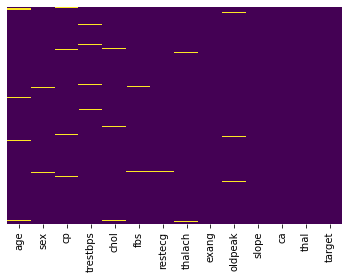

In [14]:
# visibility of field with null value 
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [15]:
# fill numerical features with median
numerical_features_dic_fill = {"age": df["age"].median(),
          "trestbps": df["trestbps"].median(),
          "chol": df["chol"].median(),
          "thalach": df["thalach"].median() ,
          "oldpeak": df["oldpeak"].median()}

df = df.fillna(value=numerical_features_dic_fill)

In [16]:
# fill categorical features
categorical_features_dic_fill = {"sex": df["sex"].mode()[0],
          "cp": df["cp"].mode()[0],
          "fbs": df["fbs"].mode()[0],
          "restecg": df["restecg"].mode()[0],
          "exang": df["exang"].mode()[0]}

df = df.fillna(value=categorical_features_dic_fill)

<AxesSubplot:>

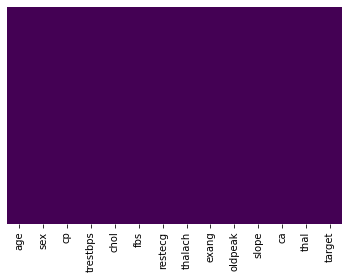

In [17]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

##### Using confidence intervals determine for which numerical features you can state with confidence of 95% that the healthy population (target = 0) mean is larger/smaller than the disease population (target = 1) mean. 

In [18]:
# using formula Difference in proportions from the lect
healthy = df.loc[df['target'] == 0]
disease = df.loc[df['target'] == 1] 
alpha = 0.05 #confidence of 95%
guma = norm.ppf(1-alpha/2)

healthy_len = healthy.shape[0]
disease_len = disease.shape[0] 


for f in numerical_features:
    mean_disease = disease[f].mean()
    mean_healthy = healthy[f].mean()
    
    std_pow_disease = pow(disease[f].std(),2) # pow(std) = p(1-p)
    std_pow_healthy = pow(healthy[f].std(),2) # pow(std) = p(1-p)
   #formula difference in proportions confidence interval
    delta_hi = (mean_healthy - mean_disease) + guma*math.sqrt(((std_pow_healthy)/healthy_len) 
                                                              + ((std_pow_disease)/disease_len ))
    delta_lo = (mean_healthy - mean_disease) - guma*math.sqrt(((std_pow_healthy)/healthy_len) 
                                                              + ((std_pow_disease)/disease_len ))
    
    #Since the interval does not contain 0, we see that the difference seen in this study was "significant."
    if delta_lo <= 0 and 0 <= delta_hi:
        print("Feature {} - The interval does not contain 0 - so the difference seen in not significant".format(f))
    elif mean_healthy > mean_disease:
        print("Feature {} - In confidence of 95% the healthy pop mean is larger than the disease pop mean".format(f))
    else:
        print("Feature {} - In confidence of 95% the healthy pop mean is smaller than the disease pop mean".format(f))
            
   

Feature age - In confidence of 95% the healthy pop mean is larger than the disease pop mean
Feature trestbps - In confidence of 95% the healthy pop mean is larger than the disease pop mean
Feature chol - The interval does not contain 0 - so the difference seen in not significant
Feature thalach - In confidence of 95% the healthy pop mean is smaller than the disease pop mean
Feature oldpeak - In confidence of 95% the healthy pop mean is larger than the disease pop mean


##### Draw histograms for each numerical feature. Inspect the observed distributions and then use MLE to plot, on the same figures, fits of the distributions.

https://www.kdnuggets.com/2021/09/determine-best-fitting-data-distribution-python.html

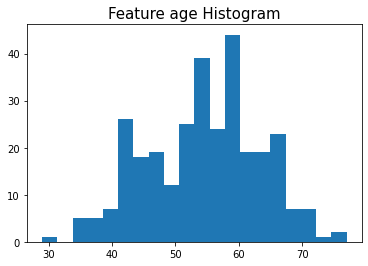

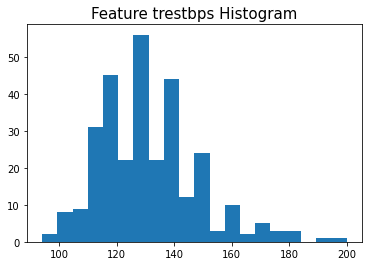

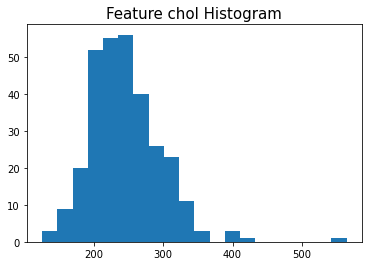

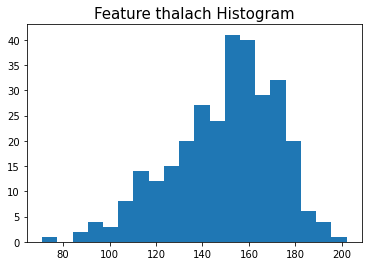

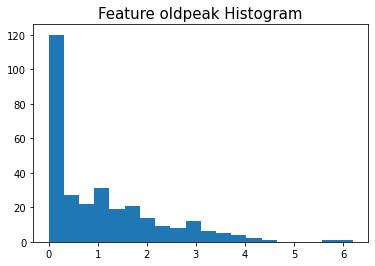

In [19]:
#Draw histograms for each numerical feature.
for f in numerical_features:
    plt.title('Feature {} Histogram'.format(f), fontsize=15)
    plt.hist(df[f], bins=20)
    plt.show()

In [20]:
!pip install distfit

[distfit] >fit..
[distfit] >transform..
[distfit] >[norm      ] [0.00 sec] [RSS: 0.0054493] [loc=54.406 scale=8.949]
[distfit] >[expon     ] [0.00 sec] [RSS: 0.0242842] [loc=29.000 scale=25.406]
[distfit] >[pareto    ] [0.03 sec] [RSS: 0.0323731] [loc=-0.081 scale=29.081]
[distfit] >[dweibull  ] [0.01 sec] [RSS: 0.0071621] [loc=54.484 scale=7.904]
[distfit] >[t         ] [0.05 sec] [RSS: 0.0054493] [loc=54.405 scale=8.949]
[distfit] >[genextreme] [0.16 sec] [RSS: 0.0868004] [loc=75.224 scale=5.684]
[distfit] >[gamma     ] [0.04 sec] [RSS: 0.0056551] [loc=-131.744 scale=0.436]
[distfit] >[lognorm   ] [0.08 sec] [RSS: 0.0054917] [loc=-1362.912 scale=1417.271]
[distfit] >[beta      ] [0.02 sec] [RSS: 0.0047952] [loc=19.758 scale=61.669]
[distfit] >[uniform   ] [0.0 sec] [RSS: 0.0146413] [loc=29.000 scale=48.000]
[distfit] >[loggamma  ] [0.02 sec] [RSS: 0.0049657] [loc=-32.827 scale=33.264]
[distfit] >Compute confidence interval [parametric]
[distfit] >plot..
[distfit] >fit..
[distfit] >tr

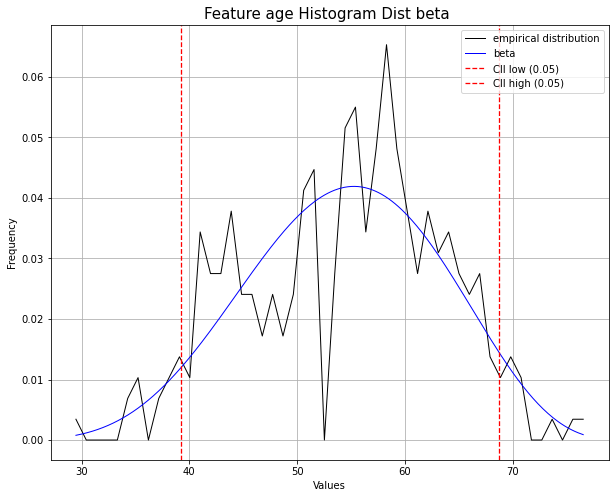

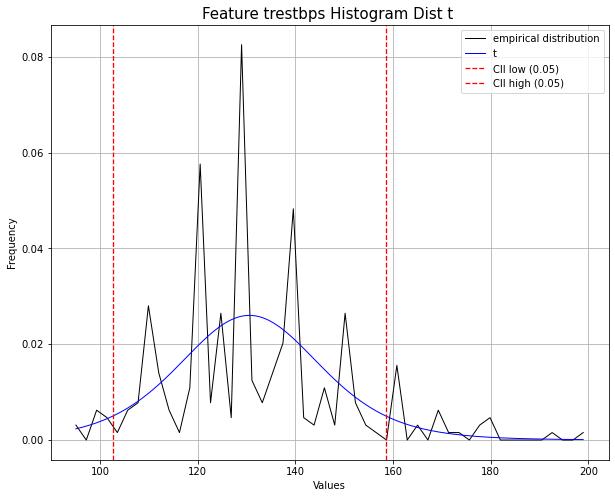

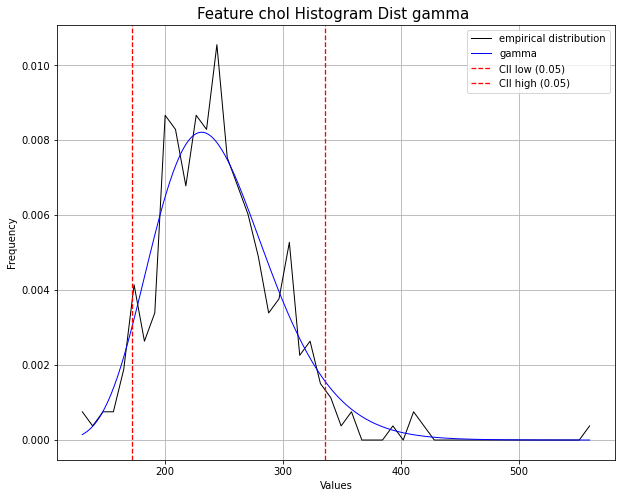

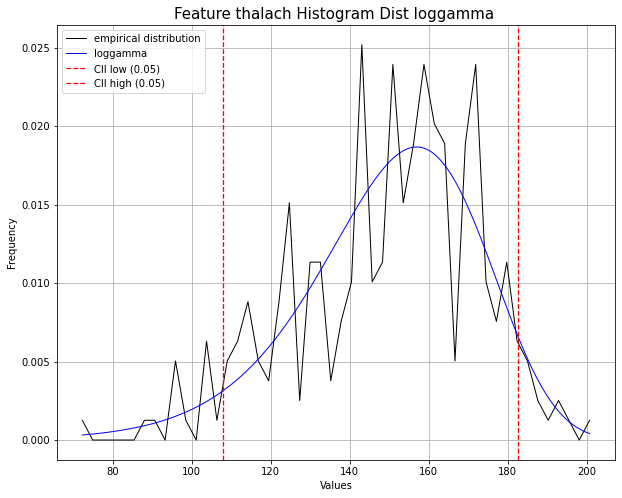

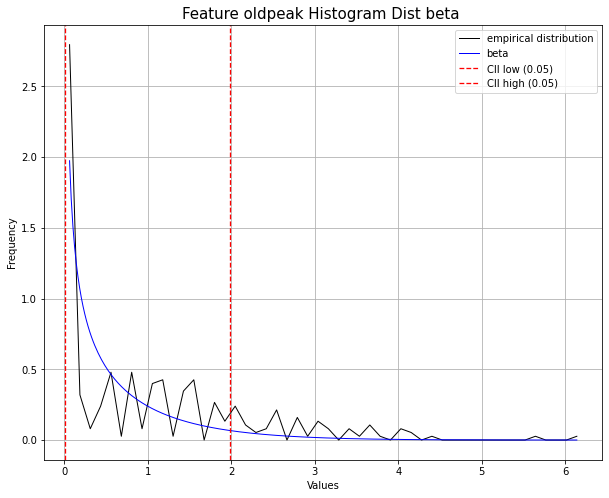

In [21]:
from distfit import distfit
dict_feature_distfit = {}
for f in numerical_features:
    X = df[f]
    # Initialize distfit
    dist = distfit()

    # Determine best-fitting probability distribution for data
    dist.fit_transform(X)
    # the distr is the minmum score
    #dict_feature_distfit[f] = dist.summary[dist.summary["score"] == dist.summary['score'].min()]['distr'].item()
    dist.plot()
    plt.title('Feature {} Histogram Dist {} '.format(f , dist.summary[dist.summary["score"] == dist.summary['score'].min()]['distr'].item() ), fontsize=15)


In [22]:
dict_feature_distfit

{}

##### For each pair of numerical feature, calculate correlations and indicate whether you find them significant. For select pairs, with significant correlations, draw joint plot with marginal histograms (see Seaborn joint plot) and find bivariate normal fits. Then use the example code below to draw plots of the bivariate pdfs (you may edit the code as you see fit).

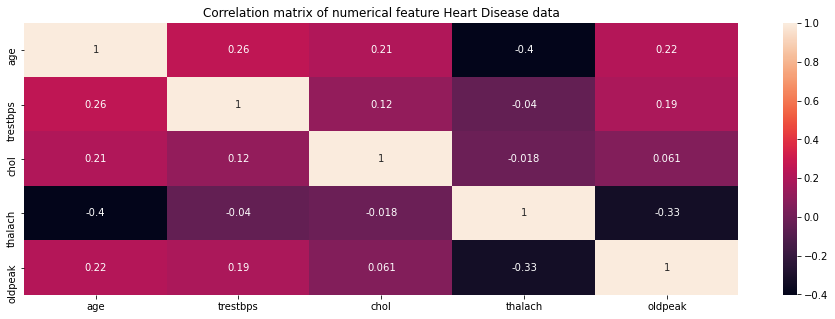

In [23]:
correlation_mat = df[numerical_features].corr()
plt.figure(figsize = (16,5))
sns.heatmap(correlation_mat, annot = True)
plt.title("Correlation matrix of numerical feature Heart Disease data")
plt.show()

We don't see significant features,
There is not a high correlation (the most higher correlation is between age & trestbps with 0.26 value - not higher for present correlation)

Try to calculate correlation with Kendall rank correlation, Spearman rank correlation.
(we don't calc Pearson correlation because we don't know if the distribution is bivariate normal)

In [24]:
options_to_corr = [("age","trestbps"),("age","chol"),("age","thalach"),("age","oldpeak"),
                   ("trestbps","chol"),("trestbps","thalach"),("trestbps","oldpeak"),
                   ("chol","thalach"),("chol","oldpeak"),
                   ("thalach","oldpeak")]

def correlation_kendall_sperman_for_set_features(df,features):
    for c in features:
        X=df[c[0]]
        Y=df[c[1]]
    #     pearsonr_r , pearsonr_p_value = stats.pearsonr(X, Y)
    #     print("Pearson for featers {} & {}: corr: {}, p_value: {}".format(c[0],c[1],pearsonr_r,pearsonr_p_value))
        kendall_tau, kendall_p_value = stats.kendalltau(X, Y)
        print("Kendall for featers {} & {}: corr: {}, p_value: {}".format(c[0],c[1],kendall_tau,kendall_p_value))
        spearmanr_rho, spearmanr_p_value = stats.spearmanr(X, Y)
        print("Spearman for featers {} & {}: corr: {}, p_value: {}".format(c[0],c[1],spearmanr_rho,spearmanr_p_value))
        print("---------------------------------------------------------------------------")

correlation_kendall_sperman_for_set_features(df,options_to_corr)

Kendall for featers age & trestbps: corr: 0.1838115983599489, p_value: 4.6781782252388324e-06
Spearman for featers age & trestbps: corr: 0.2605957148412386, p_value: 4.284385468293736e-06
---------------------------------------------------------------------------
Kendall for featers age & chol: corr: 0.13018970815641648, p_value: 0.0008975455143551905
Spearman for featers age & chol: corr: 0.18858595370234046, p_value: 0.0009710736128938687
---------------------------------------------------------------------------
Kendall for featers age & thalach: corr: -0.28367903656004106, p_value: 5.57911076695669e-13
Spearman for featers age & thalach: corr: -0.40397100260048757, p_value: 2.535267758960972e-13
---------------------------------------------------------------------------
Kendall for featers age & oldpeak: corr: 0.20475391646894245, p_value: 6.016990377741724e-07
Spearman for featers age & oldpeak: corr: 0.28264044554197887, p_value: 5.676402888173814e-07
----------------------------

We looking for "high" correlation and "low" p values (Although "low" p values doesn't mean that the correlation is strong.).

For age & thalach in Spearman we get corr: -0.40397100260048757, p_value: 2.535267758960972e-13.

For thalach & oldpeak in Spearman we get corr: -0.4189181346651152, p_value: 2.636153661049674e-14 (most higher correlation)


In [25]:
def draw_significant_correlations(df,x,y,title):
    p = sns.jointplot(data=df, x=x, y=y, kind="reg")
    p.fig.suptitle(title)
    p.fig.subplots_adjust(top=0.95)
    
    f1 = df[x]
    f2 = df[y]
    cov = np.cov(f1, f2)
    means = [f1.mean(), f2.mean()]
    plot_2d_Gaussian_pdf(means, cov)

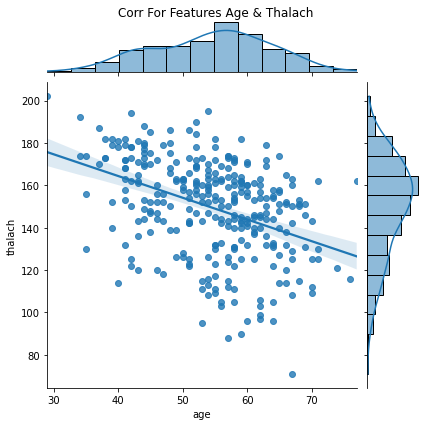

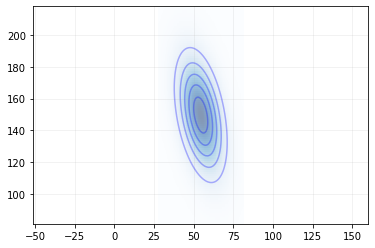

In [26]:
#For select pairs, with significant correlations,
#draw joint plot with marginal histograms (see Seaborn joint plot) and find bivariate normal fits.
draw_significant_correlations(df ,"age","thalach","Corr For Features Age & Thalach")

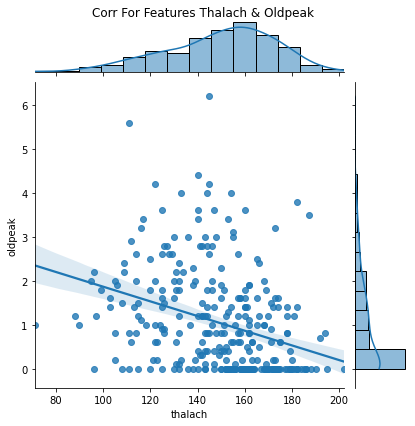

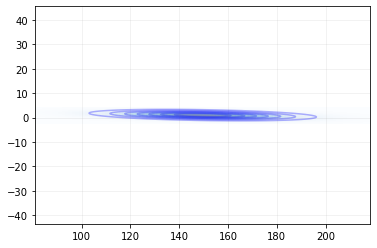

In [27]:
draw_significant_correlations(df ,"thalach","oldpeak","Corr For Features Thalach & Oldpeak")

##### Are there pairs that are significantly correlated in males but not in females? The opposite? How about healthy vs disease? Can you graphically represent this?

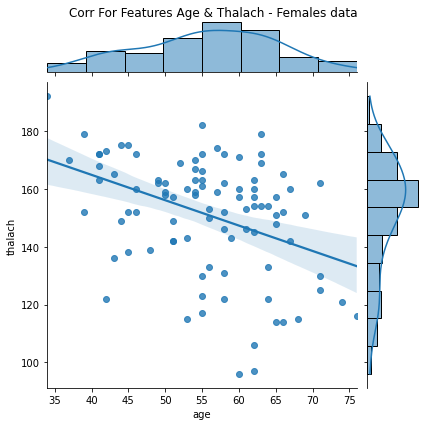

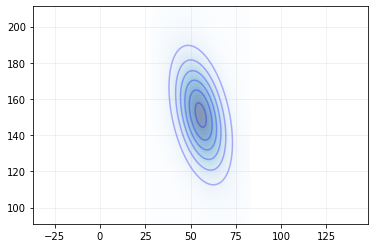

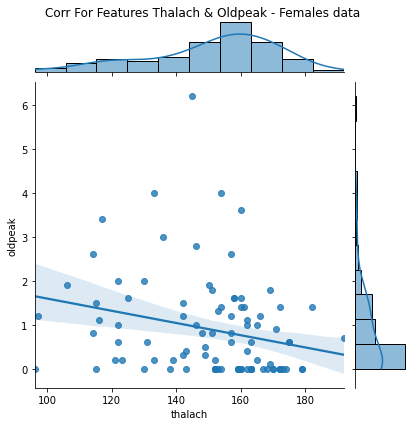

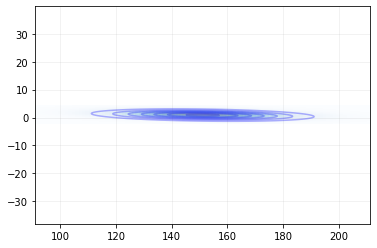

In [28]:
# Females
draw_significant_correlations(df[df["sex"] == 0] ,"age","thalach","Corr For Features Age & Thalach - Females data ")
draw_significant_correlations(df[df["sex"] == 0] ,"thalach","oldpeak","Corr For Features Thalach & Oldpeak - Females data")

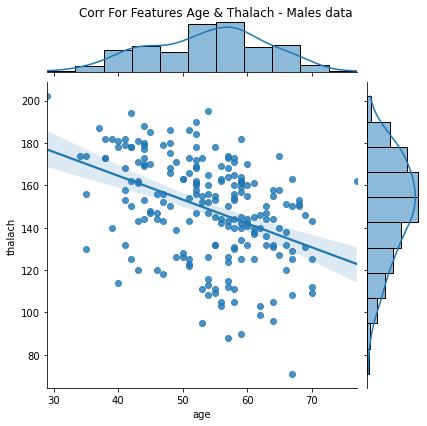

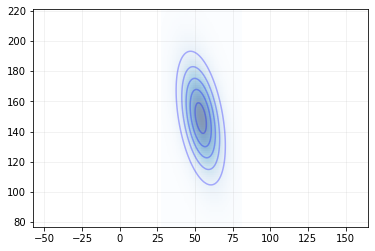

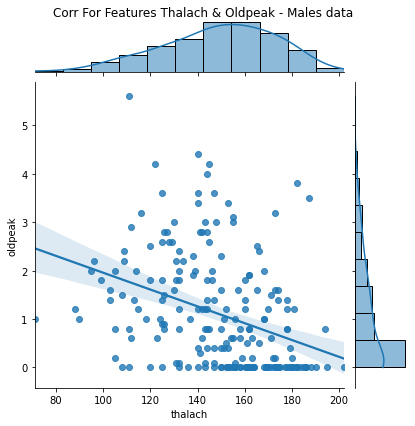

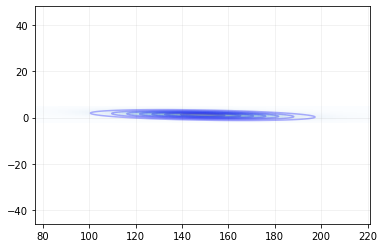

In [29]:
#Males
draw_significant_correlations(df[df["sex"] == 1] ,"age","thalach","Corr For Features Age & Thalach - Males data")
draw_significant_correlations(df[df["sex"] == 1] ,"thalach","oldpeak","Corr For Features Thalach & Oldpeak - Males data")

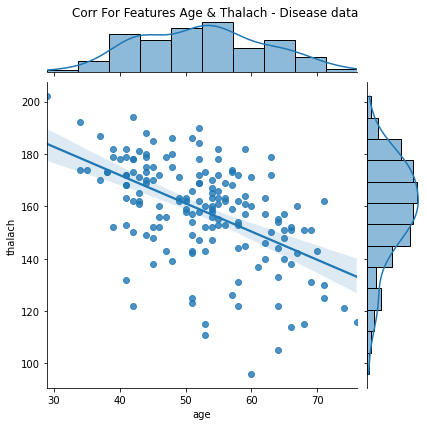

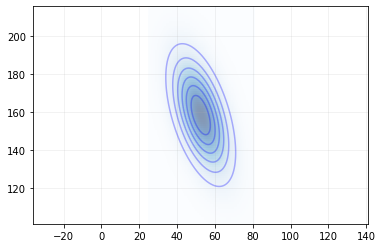

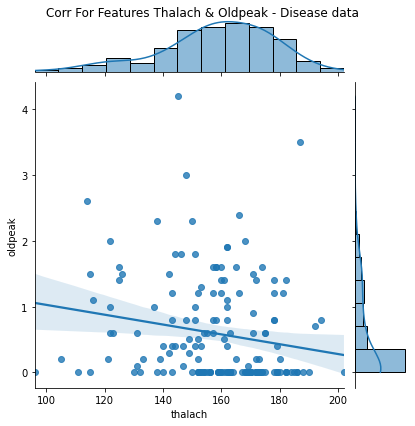

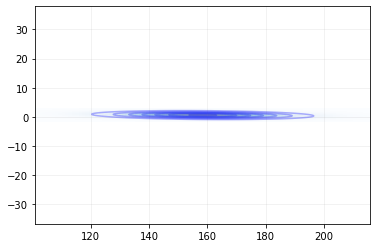

In [30]:
# Disease
draw_significant_correlations(df[df["target"] == 1] ,"age","thalach","Corr For Features Age & Thalach - Disease data")
draw_significant_correlations(df[df["target"] == 1] ,"thalach","oldpeak","Corr For Features Thalach & Oldpeak - Disease data")

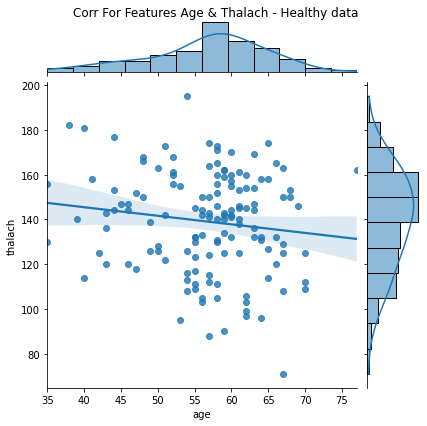

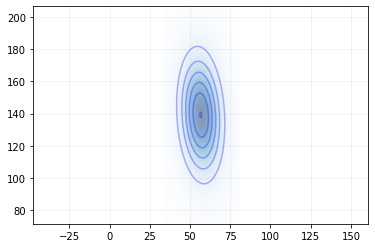

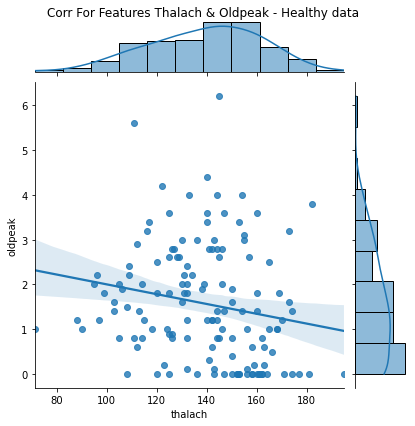

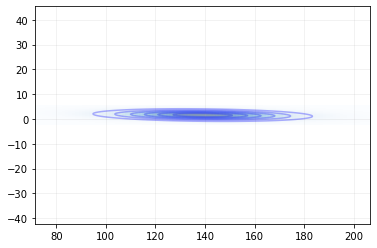

In [31]:
# Healthy
draw_significant_correlations(df[df["target"] == 0] ,"age","thalach","Corr For Features Age & Thalach - Healthy data")
draw_significant_correlations(df[df["target"] == 0] ,"thalach","oldpeak","Corr For Features Thalach & Oldpeak - Healthy data")

##### For each numerical feature, except age, plot the distribution for this feature against bins of age. In each bin provide a split violin plot, with different colors for healthy and disease.

In [32]:
numerical_features_without_age = [x for x in numerical_features if x != "age"] 

In [33]:
df['target'] = df['target'].apply(lambda x: 'healthy' if x==0 else 'disease')

In [34]:
ranges = np.array_split(list(df.sort_values(by=["age"])["age"]),5)
min_max_range = []
for r in ranges:
    min_max_range.append((r.min(),r.max()))

In [35]:
min_max_range

[(29.0, 45.0), (45.0, 53.0), (53.0, 58.0), (58.0, 62.0), (62.0, 77.0)]

In [36]:
def choose_range(x):
    for r in min_max_range:
        if x>= r[0] and x<= r[1]:
            return r 
df["age_range"] = df["age"].apply(lambda x: choose_range(x)  )

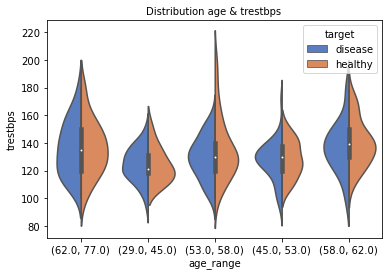

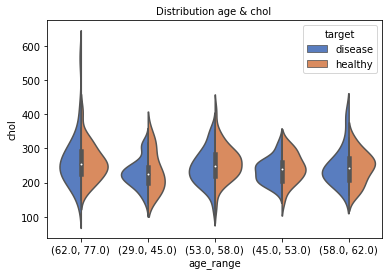

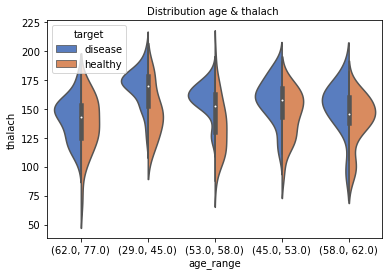

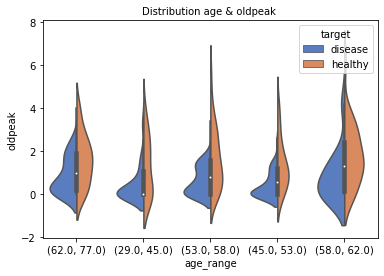

In [37]:
for f in numerical_features_without_age:
    g = sns.violinplot(x="age_range", y=f, hue="target",
                        data=df, palette="muted", split=True)
    g.set_title("Distribution age & {} ".format(f), fontsize=10)
    plt.show()

##### Suggest, state and address at least one original question.

Attempt to find correlation for different populations: males healthy, females healthy ,males disease , females disease(numerical_features)

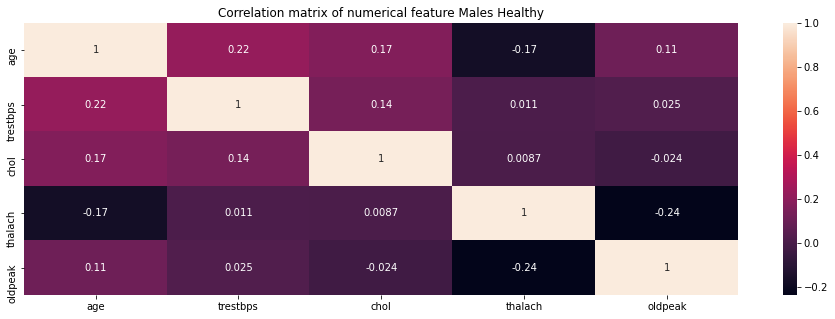

Kendall for featers age & trestbps: corr: 0.16235892458813161, p_value: 0.013385910868474397
Spearman for featers age & trestbps: corr: 0.23591656320007603, p_value: 0.011141786860981946
---------------------------------------------------------------------------
Kendall for featers age & chol: corr: 0.0815830345100481, p_value: 0.20464930177268326
Spearman for featers age & chol: corr: 0.12355775114109979, p_value: 0.18831448227179973
---------------------------------------------------------------------------
Kendall for featers age & thalach: corr: -0.09029606479018093, p_value: 0.16168541610289489
Spearman for featers age & thalach: corr: -0.122036396690024, p_value: 0.19385469724793705
---------------------------------------------------------------------------
Kendall for featers age & oldpeak: corr: 0.12080498045523651, p_value: 0.06617596202856571
Spearman for featers age & oldpeak: corr: 0.16483983849022432, p_value: 0.07832931019407909
-------------------------------------------

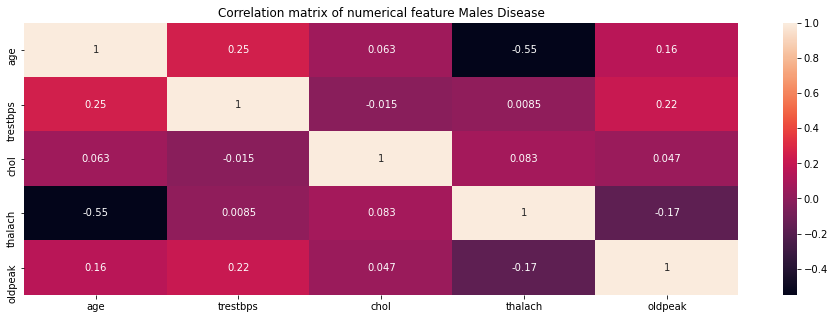

Kendall for featers age & trestbps: corr: 0.13950922476659655, p_value: 0.05789739353071879
Spearman for featers age & trestbps: corr: 0.20174115800774356, p_value: 0.05247732928642853
---------------------------------------------------------------------------
Kendall for featers age & chol: corr: 0.05914377903771524, p_value: 0.40976347669192204
Spearman for featers age & chol: corr: 0.08372022008130955, p_value: 0.4249568475601202
---------------------------------------------------------------------------
Kendall for featers age & thalach: corr: -0.39178315843129086, p_value: 5.2542681054758784e-08
Spearman for featers age & thalach: corr: -0.5460693416683724, p_value: 1.5015409519031456e-08
---------------------------------------------------------------------------
Kendall for featers age & oldpeak: corr: 0.2071070562517175, p_value: 0.007315903212085871
Spearman for featers age & oldpeak: corr: 0.27592779347823704, p_value: 0.007425202550906995
-------------------------------------

In [38]:
options_to_corr = [("age","trestbps"),("age","chol"),("age","thalach"),("age","oldpeak"),
                   ("trestbps","chol"),("trestbps","thalach"),("trestbps","oldpeak"),
                   ("chol","thalach"),("chol","oldpeak"),
                   ("thalach","oldpeak")]

correlation_mat = df[(df["sex"] == 1) & (df["target"] == 'healthy')][numerical_features].corr()
plt.figure(figsize = (16,5))
sns.heatmap(correlation_mat, annot = True)
plt.title("Correlation matrix of numerical feature Males Healthy")
plt.show()

correlation_kendall_sperman_for_set_features(df[(df["sex"] == 1) & (df["target"] == 'healthy')],options_to_corr)

correlation_mat = df[(df["sex"] == 1) & (df["target"] == 'disease')][numerical_features].corr()
plt.figure(figsize = (16,5))
sns.heatmap(correlation_mat, annot = True)
plt.title("Correlation matrix of numerical feature Males Disease")
plt.show()

correlation_kendall_sperman_for_set_features(df[(df["sex"] == 1) & (df["target"] == 'disease')],options_to_corr)

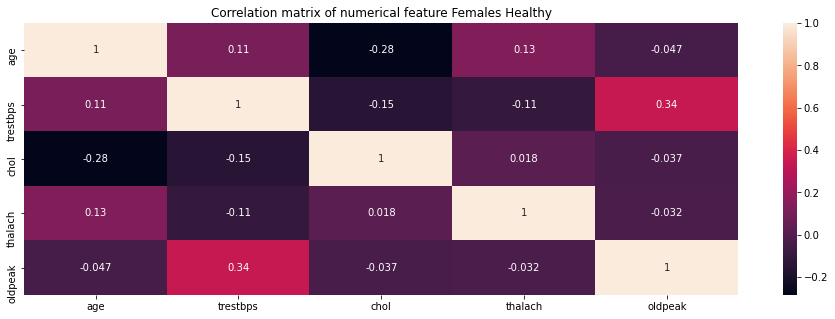

Kendall for featers age & trestbps: corr: 0.1218530419883226, p_value: 0.4369772805589507
Spearman for featers age & trestbps: corr: 0.16554163895895588, p_value: 0.45032839301892136
---------------------------------------------------------------------------
Kendall for featers age & chol: corr: -0.17256647510863773, p_value: 0.26292032846785895
Spearman for featers age & chol: corr: -0.24365866031239952, p_value: 0.26255598864598145
---------------------------------------------------------------------------
Kendall for featers age & thalach: corr: 0.26295843826078136, p_value: 0.08802144571927493
Spearman for featers age & thalach: corr: 0.31135544846865354, p_value: 0.14812904417533967
---------------------------------------------------------------------------
Kendall for featers age & oldpeak: corr: -0.025054867600094295, p_value: 0.8724805812156678
Spearman for featers age & oldpeak: corr: -0.031453012842485535, p_value: 0.8867118462461063
------------------------------------------

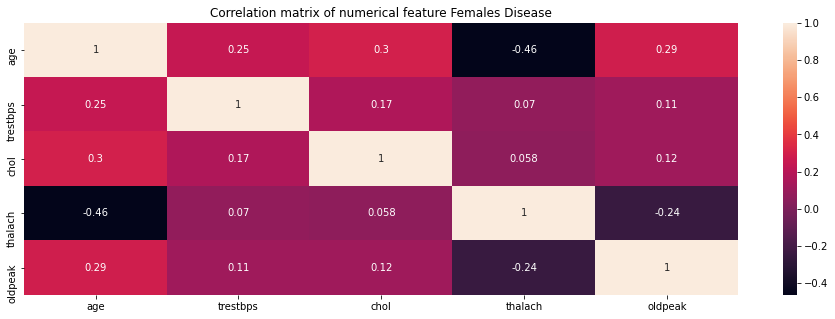

Kendall for featers age & trestbps: corr: 0.19319903860282195, p_value: 0.020982622353784657
Spearman for featers age & trestbps: corr: 0.25122592424972573, p_value: 0.03328054519305118
---------------------------------------------------------------------------
Kendall for featers age & chol: corr: 0.206291687964156, p_value: 0.011530290980794331
Spearman for featers age & chol: corr: 0.2800354738330776, p_value: 0.01719676815621625
---------------------------------------------------------------------------
Kendall for featers age & thalach: corr: -0.3065198608761206, p_value: 0.00019771326732109034
Spearman for featers age & thalach: corr: -0.43337654913913265, p_value: 0.00014316149438333006
---------------------------------------------------------------------------
Kendall for featers age & oldpeak: corr: 0.19713172180067776, p_value: 0.023340771474812956
Spearman for featers age & oldpeak: corr: 0.28571956484424277, p_value: 0.014977171781536321
------------------------------------

In [39]:
correlation_mat = df[(df["sex"] == 0) & (df["target"] == 'healthy')][numerical_features].corr()
plt.figure(figsize = (16,5))
sns.heatmap(correlation_mat, annot = True)
plt.title("Correlation matrix of numerical feature Females Healthy")
plt.show()

correlation_kendall_sperman_for_set_features(df[(df["sex"] == 0) & (df["target"] == 'healthy')],options_to_corr)

correlation_mat = df[(df["sex"] == 0) & (df["target"] == 'disease')][numerical_features].corr()
plt.figure(figsize = (16,5))
sns.heatmap(correlation_mat, annot = True)
plt.title("Correlation matrix of numerical feature Females Disease")
plt.show()

correlation_kendall_sperman_for_set_features(df[(df["sex"] == 0) & (df["target"] == 'disease')],options_to_corr)

We looking for "high" correlation and "low" p values (Although "low" p values doesn't mean that the correlation is strong.).

In Males Disease the featur is correlate:
age & thalach (age and maximum heart rate achieved ) by sperman corr: -0.5460693416683724, p_value: 1.5015409519031456e-08

In Females Disease the featurs are most correlate:
age & thalach (age and maximum heart rate achieved ) by sperman -0.43337654913913265, p_value: 0.00014316149438333006
                                                      
we see in this case that the age & thalach high corralat in Disease regardless of sex.                                                      
                                                      

Hypotheses (We are not doctors, general assumptions):
* Man more disease than women.   
* Thalassemia patients will be more likely to have heart disease.
* Older people will be more likely to have heart disease.
* People with High-cholesterol  will be more likely to have heart disease.
* Patients with ST depression induced by exercise relative to rest will be more patients with heart disease.

In [57]:
if df[(df["sex"] == 1) & (df["target"] == 'disease')].shape[0] > df[(df["sex"] == 0) & (df["target"] == 'disease')].shape[0]:
    print("The Hypotheses Man more disease than women is True base on this dataset") 
else:
    print("The Hypotheses Man more disease than women is False base on this dataset") 

The Hypotheses Man more disease than women is True base on this dataset


In [58]:
if df[(df['thal'] > 1) & (df["target"] == 'disease') ].shape[0] > df[(df['thal'] > 1) & (df["target"] == 'healthy')].shape[0]:
    print("Thalassemia patients will be more likely to have heart disease is True base on this dataset") 
else:
    print("Thalassemia patients will be more likely to have heart disease is False base on this dataset") 

Thalassemia patients will be more likely to have heart disease is True base on this dataset


<AxesSubplot:title={'center':'Age'}, xlabel='target', ylabel='age'>

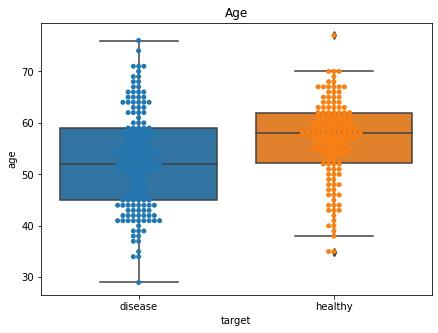

In [59]:
plt.title('Age')
sns.boxplot(x='target', y='age', data=df)
sns.swarmplot(x="target", y="age", data=df)

We can see that the disease population is indeed overall younger than the healthy population (not only the mean).
The youngest patients in the dataset are sick and the oldest are healthy.

this is against to our assumption that Older people will be more likely to have heart disease..

<AxesSubplot:title={'center':'cholesterol'}, xlabel='target', ylabel='chol'>

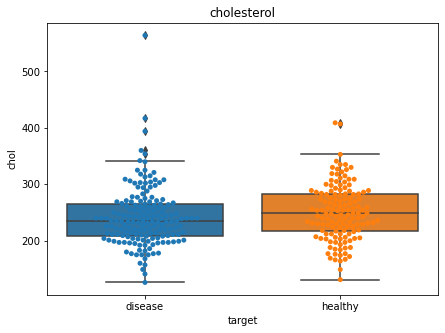

In [60]:
plt.title('cholesterol')
sns.boxplot(x='target', y='chol', data=df)
sns.swarmplot(x="target", y="chol", data=df)

High-cholesterol is more than 240 mg/dL.
We can see that the for alot patients in healthy population have also high cholesterol. (even more the disease)
This is against to our assumption that  people with High-cholesterol  will be more likely to have heart disease...

### Question 3 - Heavy Tailed Distributions and the Exponential Distribution (15 points)

### Heavy Tailed Distributions

Recall the definition of Heavy Tailed distribution from the lectures.

*A distribution is said to have a heavy right tail if its tail probabilities vanish slower than any exponential*
$$ \forall t>0, \lim_{x\to\infty} e^{tx}P(X>x)=\infty $$

Does the standard log-normal distribution have a heavy right tail? prove your answer.

The standard log-normal distribution have a heavy right tail. 
(we lean in the lacture that thee The log-normal distribution has a heavy right- side tail , and standard log-normal distribution is case of log-normal distribution).

Let $Y = e^{X}$ be a log-normal distribution random variable (where X is the standard normal).

$$
\lim_{x\to\infty} e^{tx}P(Y > x) =
\lim_{x\to\infty} e^{tx}\big(1-P(Y \leq x)\big) =
\lim_{x\to\infty} e^{tx}\big(1-P(e^X \leq x)\big) =
\lim_{x\to\infty} e^{tx}\big(1-P(X \leq ln x)\big) =
\lim_{x\to\infty} e^{tx}\big(1-F(ln x)\big)
$$

From rule power:
$$e^x = \frac{1}{e^{-x}}  --->  e^{tx} = \frac{1}{e^{-tx}}$$ 

Assign:
$$\lim_{x\to\infty} \frac{1}{e^{-tx}} \cdot \big(1-F(ln x)\big) = \lim_{x\to\infty} \frac{1-F(ln x)}{e^{-tx}}$$

Applying L'Hôpital's rule $\big(\lim_{x \to a} \frac{f(x)}{g(x)} = \lim_{x \to a} \frac{f'(x)}{g'(x)} \big)$, we get:

$$
f'(x) =  \frac{1}{x \sqrt{2\pi}}e^{-\frac{1}{2} (ln x)^2} ,g'(x) = t \cdot e^{-tx}
$$

$$\lim_{x\to\infty} \frac{1-F(ln x)}{e^{-tx}} = \lim_{x\to\infty} \frac{f'(ln x)}{t \cdot e^{-tx}} = \lim_{x\to\infty} \frac{\frac{1}{x \sqrt{2\pi}}e^{-\frac{1}{2} (ln x)^2}}{t \cdot e^{-tx}} = \lim_{x\to\infty} \frac{e^{tx}} {e^{\frac {(ln x)^2}{2}} \cdot tx \sqrt{2\pi}}$$

$$ \lim_{x\to\infty} e^{tx} = \infty $$
$$ \lim_{x\to\infty} e^{\frac {(ln x)^2}{2}} \cdot tx \sqrt{2\pi} = \infty$$

so:
$$ \lim \frac{\infty}{\infty} = \infty $$

$$\forall t > 0, \lim_{x\to\infty} e^{tx}P(Y > x) = \infty$$


### Special Properties of the Exponential Distribution

Let $X_1 \sim exp(\lambda_1)$ and $X_2 \sim exp(\lambda_2)$ be two independent exponential random variables.

Calculate $P(X_1 < X_2)$.

http://www.columbia.edu/~ks20/4106-18-Fall/Notes-exp.pdf

from The exponential distribution is memoryless (lecture): $e^{-\lambda x} = P(X > x)$

from independent:
$ P(Y=y|x=x) = P(Y=y) $

Let $ f1(x) = \lambda_1 \cdot e^{\lambda_1x} $ denote the density function for X1.

so:

$P(X1 < X2 | X1=x) = P( x < X2 | X1=x) = P( x < X2 ) = e^{-\lambda_2 x}$

$P(X1 < X2) = \int_0^\infty P(X1 < X2 | X1=x) \cdot f1(x) dx 
 =  \int_0^\infty e^{-\lambda_2 x} \cdot \lambda_1 e^{\lambda_1x} dx = 
 \lambda_1 \int_0^\infty e^{-(\lambda_2 + \lambda_1) x} dx = 
$


$$\frac{\lambda_1}{(\lambda_2 + \lambda_1)}$$


### Question 4 - CLT for Markov chains (15 points)

In this exercise you will construct trajectories of Markovian dice rolling results in the following way.<br>
The first roll, X0, is Unif(1..6)<br>
After i rolls are determined the i+1st, Xi+1, is drawn according to the row that corresponds to the value of Xi in the matrix T below. <br>
In other words, T is the transition matrix of a Markov chain and the initial distribution is uniform.

\begin{equation*}
T = 
\begin{pmatrix}
0.4 & 0.2 & 0.1 & 0 & 0.1 & 0.2 \\
0.2 & 0.4 & 0.2 & 0.1 & 0 & 0.1 \\
0.1 & 0.2 & 0.4 & 0.2 & 0.1 & 0 \\
0 & 0.1 & 0.2 & 0.4 & 0.2 & 0.1 \\
0.1 & 0 & 0.1 & 0.2 & 0.4 & 0.2 \\
0.2 & 0.1 & 0 & 0.1 & 0.2 & 0.4
\end{pmatrix}
\end{equation*}

In [23]:
import numpy as np
 
class MarkovChain(object):
    def __init__(self, transition_matrix, states):
        """
        Initialize the MarkovChain instance.
 
        Parameters
        ----------
        transition_matrix: 2-D array
            A 2-D array representing the probabilities of change of 
            state in the Markov Chain.
 
        states: 1-D array 
            An array representing the states of the Markov Chain. It
            needs to be in the same order as transition_matrix.
        """
        self.transition_matrix = np.atleast_2d(transition_matrix)
        self.states = states
        self.index_dict = {self.states[index]: index for index in 
                           range(len(self.states))}
        self.state_dict = {index: self.states[index] for index in
                           range(len(self.states))}
 
    def next_state(self, current_state):
        """
        Returns the state of the random variable at the next time 
        instance.
 
        Parameters
        ----------
        current_state: str
            The current state of the system.
        """
        return np.random.choice(
         self.states, 
         p=self.transition_matrix[self.index_dict[current_state], :]
        )
 
    def generate_states(self, current_state, no=10):
        """
        Generates the next states of the system.
 
        Parameters
        ----------
        current_state: str
            The state of the current random variable.
 
        no: int
            The number of future states to generate.
        """
        future_states = []
        for i in range(no):
            next_state = self.next_state(current_state)
            future_states.append(next_state)
            current_state = next_state
        return future_states

In [24]:
def draw_hist(mean_matrix,n,s):
    """
        draw the histogram
    """
    plt.title('{} Trajectories Averages Histogram for Markov chains length {} '.format(n,s), fontsize=15)
    plt.xlim([1, 6])
    plt.hist(mean_matrix, bins=20)
    plt.show()
    
def trajectories(markov_chain,n,s):
    """
        calculat the matrix of n trajectories and then return the mean matrix.
    """
    res_matrix = []
    for i in range(n):
        res_matrix.append(markov_chain.generate_states(current_state=0, no=s))
    mean_matrix = np.mean(res_matrix, axis=1)
    return mean_matrix

In [25]:
transition_matrix = [[0.4 , 0.2 , 0.1 , 0 , 0.1 , 0.2 ],
                    [0.2 , 0.4 , 0.2 , 0.1 , 0 , 0.1 ],
                    [0.1 , 0.2 , 0.4 , 0.2 , 0.1 , 0 ],
                    [0 , 0.1 , 0.2 , 0.4 , 0.2 , 0.1 ],
                    [0.1 , 0 , 0.1 , 0.2 , 0.4 , 0.2 ],
                    [0.2 , 0.1 , 0 , 0.1 , 0.2 , 0.4]]

#### 4.A
Construct 1000 trajectories, each of length 30.
1. What do you expect the average value of all 30 numbers in a trajectory to be?
2. Compute the average value of each such trajectory. Draw a histogram of the 1000 numbers you received, using 20 bins.
3. What does the distribution look like? What are the empirical mean and the std?

##### 4.A - 1
mean uniform : E(X) = $(1/2) (a + b)$

In dice rolling all the probabilty are the same 1/6, so the mean is also the same E(X0)=..=E(X5)=(1/2)*(1+6)=3.5

for Markov Chain of length 30 :
$${E({\frac {\sum_{i=0}^{29} (X_i)}{30})}} = \frac {{\sum_{i=0}^{29} E(X_i)}}{30} = \frac {30 \cdot E(X_0)}{30} = E(X_0) = 3.5$$

##### 4.A - 2

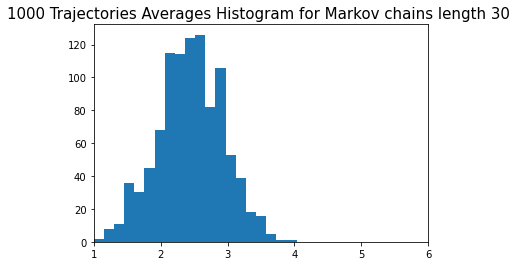

In [26]:
n= 1000
states_to_generate = 30

dice_rolling_chain= MarkovChain(transition_matrix=transition_matrix,states=[0,1,2,3,4,5]) #states=['X0','X1', 'X2', 'X3','X4', 'X5']

mean_matrix_30 = trajectories(dice_rolling_chain,n,states_to_generate)
draw_hist(mean_matrix_30,n,states_to_generate)


##### Ans 4.A - 3

In [27]:
mean_30 = mean_matrix_30.mean()
std_30 = mean_matrix_30.std()
print("The distribution look like normal distribution")
print("The empirical mean {}\nThe empirical std {}".format(mean_30 ,std_30))

The distribution look like normal distribution
The empirical mean 2.4469666666666665
The empirical std 0.487940933356123


##### 4.B
Construct 1000 trajectories, each of length 500.
1. What do you expect the average value of all 500 numbers in a trajectory to be?
2. Compute the average value of each such trajectory. Draw a histogram of the 1000 numbers you received, using 20 bins.
3. What does the distribution look like? What are the empirical mean and the std?

##### Ans 4.B - 1
mean uniform : E(X) = $(1/2) (a + b)$

in dice rolling all the probabilty are the same 1/6, so the mean is also the same E(X0)=..=E(X5)=(1/2)*(1+6)=3.5

for Markov Chain of length 500 :
$${E({\frac {\sum_{i=0}^{499} (X_i)}{500})}} = \frac {{\sum_{i=0}^{499} E(X_i)}}{500} = \frac {500 \cdot E(X_0)}{500} = E(X0) = 3.5$$

##### Ans 4.B - 2

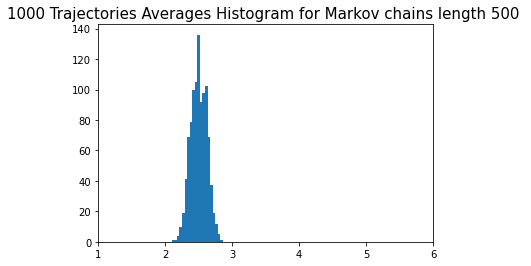

In [28]:
n= 1000
states_to_generate = 500

dice_rolling_chain= MarkovChain(transition_matrix=transition_matrix,states=[0,1,2,3,4,5]) #states=['X0','X1', 'X2', 'X3','X4', 'X5']

mean_matrix_500 = trajectories(dice_rolling_chain,n,states_to_generate)
draw_hist(mean_matrix_500,n,states_to_generate)


##### Ans 4.B - 3

In [29]:
mean_500 = mean_matrix_500.mean()
std_500 = mean_matrix_500.std()
print("The distribution look like normal distribution\nThe empirical mean {}\nThe empirical std {}".format(mean_500 ,std_500))

The distribution look like normal distribution
The empirical mean 2.4986279999999996
The empirical std 0.12045303489742382


#### 4.C
Draw normal fit curves on your two histograms.

##### Ans 4.C

C:\Users\lazrati\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


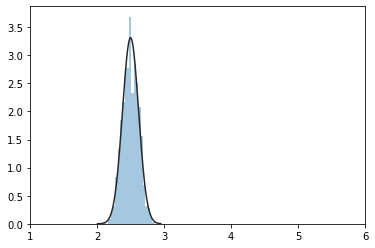

C:\Users\lazrati\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


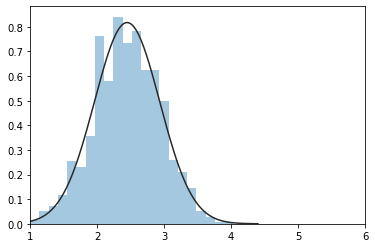

In [30]:
sns.distplot(mean_matrix_500, fit=stats.norm, kde=False)
plt.xlim(1, 6)
plt.show()

sns.distplot(mean_matrix_30, fit=stats.norm, kde=False)
plt.xlim(1, 6)
plt.show()

#### 4.D
Write a python code to calculate $Cov(X_0,X_i)$ for $i=1,..,500$ based on $\pi_0$ and $T$. 

Compute the values for our case.

Definitions:

$E(X)=\sum _{i}x_{i}P(X=x_{i})$

$Cov(X_0, X_i) = E(X_0X_i) - E(X_0)E(X_i)$

$P(X = u, Y = v) = P(X = u) \cdot P(Y = v | X = u)$

$P(X = v | Y = u) = T^i[u,v]$ (from lecture)

In dice rolling all the probabilty are the same 1/6, so the mean is also the same E(X0)=..=E(Xi)=(1/2)*(1+6)=3.5

To calc $Cov(X_0, X_i)$ we should calc $E(X0Xi) - E(X0)E(Xi)$ from dice rolling we know $E(X_0)E(X_i)=3.5*3.5=12.25$, so we need to calc $E(X_0X_i)$.

we can calc $E(X0Xi)$ by all the possible combunation for X0 to Xi  ( K^2 elements (6^2 = 36)) , 

$1 \cdot 1 \cdot P(X0=1,Xi=1) +$

$1 \cdot 2 \cdot P(X0=1,Xi=2) + $

$1 \cdot 3 \cdot P(X0=1,Xi=3) + $

...

$1 \cdot k \cdot P(X0=1,Xi=k) + $

$2 \cdot 1 \cdot P(X0=2,Xi=1) + $

...

$2 \cdot k \cdot P(X0=2,Xi=k) + $

...

$k \cdot k \cdot P(X0=k,Xi=k) $


$$
E(X0Xi)= \sum _{u=1}^{k}\sum _{v=1}^{k} u \cdot v \cdot P(X0=k,Xi=j)
$$

$$
E(X0Xi)= \sum _{u=1}^{k}\sum _{v=1}^{k} u \cdot v \cdot P(X_0 = u) \cdot P(X_i = v | X_0 = u)
$$

$$
E(X0Xi)= \sum _{u=1}^{k}\sum _{v=1}^{k} u \cdot v \cdot P(X_0 = u) \cdot T^i[u,v]
$$
so :
$$Cov(X_0, X_i) = \sum _{u=1}^{k}\sum _{v=1}^{k} u \cdot v \cdot P(X_0 = u) \cdot T^i[u,v] - E(X_0)E(X_i)$$

In [31]:
e_x0_xi = 0.0
#e_x0=e_xi=3.5
e_xi = 3.5
pi= 1/6

cov_list = []
for i in range(1,500+1):
    for u in range(1,7):
        for v in range(1,7):
            e_x0_xi += u * v * pi * matrix_power(transition_matrix, i)[u-1,v-1]
    
    cov_list.append(e_x0_xi-(e_xi*e_xi))
    e_x0_xi = 0.0
np.array(cov_list)

array([1.11666667e+00, 5.16666667e-01, 2.52666667e-01, 1.25466667e-01,
       6.25866667e-02, 3.12666667e-02, 1.56282667e-02, 7.81314667e-03,
       3.90637867e-03, 1.95315067e-03, 9.76567627e-04, 4.88282275e-04,
       2.44140830e-04, 1.22070353e-04, 6.10351645e-05, 3.05175798e-05,
       1.52587894e-05, 7.62939461e-06, 3.81469730e-06, 1.90734866e-06,
       9.53674338e-07, 4.76837180e-07, 2.38418602e-07, 1.19209314e-07,
       5.96046661e-08, 2.98023473e-08, 1.49011861e-08, 7.45060724e-09,
       3.72531872e-09, 1.86267535e-09, 9.31354549e-10, 4.65693262e-10,
       2.32862618e-10, 1.16449073e-10, 5.82414117e-11, 2.91411340e-11,
       1.45874424e-11, 7.31326111e-12, 3.67705866e-12, 1.85984561e-12,
       9.48574552e-13, 4.97379915e-13, 2.70006240e-13, 1.56319402e-13,
       9.94759830e-14, 7.46069873e-14, 5.86197757e-14, 5.32907052e-14,
       5.15143483e-14, 5.15143483e-14, 5.15143483e-14, 5.15143483e-14,
       5.32907052e-14, 5.32907052e-14, 5.32907052e-14, 5.68434189e-14,
      

#### 4.E - Bonus (5 Points)
Let $\bar{X_n}$ be the sample average for a single trajectory of length $n$.
1. Show that **in our case**:
$$E(\bar{X_n}) =E(X_0)$$
What is it in our case ($\pi_0$ and $T$ as defined above)?
2. Show that 
$$Var(\bar{X_n}) = \frac{1}{n}\sigma_0^2 + \frac{2}{n^2}\sum_{d=1}^{n-1}(n-d)Cov(X_0, X_d)$$
Calculate it for our case.
3. Formulate the CLT for Markov Chains.
4. Graphically show that the CLT holds for n=500 in our case.

##### 4.e.1
in dice rolling all the probabilty are the same 1/6, so the mean is also the same E(X0)=..=E(X5)=(1/2)*(1+6)=3.5

for each i {i:0...n}  we sample E(X0) or ..or E(X5) ,and all of them with probabilty 3.5 ,so the mean of n sample will be with probabilty 3.5 
for Markov Chain of length n :
$${E({\frac {\sum_{i=0}^{n} (X_i)}{n})}} = \frac {{\sum_{i=0}^{n} E(X_i)}}{n} = \frac {n \cdot E(X_0)}{n} = E(X0) = 3.5$$ ,$$E(\bar{X_n}) =E(X_0)$$

$T$ = $T$

$\pi_0$ = X0

In [32]:
##### 4.e.2

In [36]:
# calc for our case : 
#     n=500
#     E(X)=3.5
#     var(X)= (7-1)^2/12 = 3
# cov_list - from the 4.d
n=500
var=3
a = (1/n) * (pi*pi)
s =0 
for i in range(1,n):
    s=+ cov_list[i]*(n-i)
    
print("var(hat Xn) = {}".format(a+(2/n*n)*s))


var(hat Xn) = 5.55555565289991e-05


##### 4.e.3
##### Formulate the CLT for Markov Chains.
The sequence ${X_1}..{X_n}$ of random elements of some set is a Markov chain that has a stationary probability distribution and
the initial distribution of the process, i.e. the distribution of $E(X_1)$, is the stationary distribution, so that ${X_1}..{X_n}$ are identically distributed.
In the classic central limit theorem these random variables would be assumed to be independent, but here we have only the weaker assumption that the process has the Markov property and
g(x) is some (measurable) real-valued function for which $Var((g(X_{1}))<+\infty$

Now let

\begin{aligned}\mu &=\operatorname {E} (g(X_{1})),\\\sigma ^{2}&=\operatorname {var} (g(X_{1}))+2\sum _{k=1}^{\infty }\operatorname {cov} (g(X_{1}),g(X_{1+k})),\\{\widehat {\mu }}_{n}&={\frac {1}{n}}\sum _{k=1}^{n}g(X_{k}).\end{aligned}

Then as n -> $\infty$ we have
\begin{aligned}\\{\widehat {\mu }}_{n} = Normal(\mu, \sigma^{2} /\ \mu )\end{aligned}


C:\Users\lazrati\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


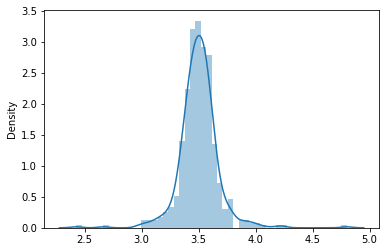

In [18]:
# Central Limit Theorem
n = 500
# In each simulation, there is one trial more than the previous simulation
avg = []
for i in range(2,n):
    a = np.random.randint(1,7,i)
    avg.append(np.average(a))

sns.distplot(avg)
plt.show()

### Question 5 - Distributions (15 Points)

Let $X$ be a random variable with a median value $Med(X) = m$. Recall that this means that $P(X\le m)=0.5$.

Consider a sample $\vec{x}(n) = x_1,...,x_n$ sampled independently from $X$. Without loss generality, assume that the observations are sorted. That is, $x_1 \le x_2 \le ... \le x_n$. Also assume that $n$ is odd and $n > 100$.

Let $R(\vec{x}(n))$ be the largest index $i \in {1,...,n}$ such that $x_i \le m$.

1. What is the distribution of $R$?
1. Given $n$, compute a function $\lambda (n)$ so that $P(x_{\lambda (n)} \le m) \ge 0.95)$ and $P(x_{\lambda (n)+1} \le m) < 0.95)$.